# Exercise 3

### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
ls

 DS_Challenge.ipynb         README.md                 searches.csv.bz2
'Exercise 5.ipynb'          bookings.csv.bz2          top_airports.csv
'Exercises 3 and 4.ipynb'   bookings.sample.csv.bz2


Open and check a sample of the file

In [30]:
df = pd.read_csv("searches.csv.bz2", sep='^', nrows=49999)
df.sample(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
2321,2013-01-03,13:00:37,CCP,3565e31495ecfd46fa018339d20382b1,SA,DMM,TIF,0,1,DMM,TIF,2013-01-06,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
5500,2013-01-06,13:50:21,MPT,b2f919c3d6a9ba67140ad215791fb7a1,RU,MOW,GAU,0,1,MOW,GAU,2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MOW
20188,2013-01-21,17:36:55,FCP,7da60d9e60a322d3fff7e00cb62baa53,BR,MAO,BVB,0,1,MAO,BVB,2013-02-05,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
38185,2013-02-08,18:08:39,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,MIL,TUN,1,2,MIL,TUN,2013-02-09,NaN,NaN,TUN,MIL,2013-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
19268,2013-01-20,17:58:09,CAL,6ab7b32ce694d67b2a0188c356a81ca6,VE,CCS,STD,0,1,CCS,STD,2013-01-27,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CCS
7449,2013-01-08,17:44:40,MPT,b04e0620a297a1b50819d31535aa5b61,US,NYC,LON,1,2,NYC,LON,2013-02-01,NaN,NaN,LON,NYC,2013-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DTW
15597,2013-01-16,19:46:37,MPT,4e05833a9117d44bc8649c315adc12d8,SE,UME,STO,1,2,UME,STO,2013-06-06,NaN,NaN,STO,UME,2013-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
14836,2013-01-15,19:54:36,FXR,3c28d84b4edf9000ebd5071c7bf37912,DE,DUS,CPH,1,2,DUS,CPH,2013-04-30,KL,Y,CPH,DUS,2013-05-04,KL,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,446d2166e5b4e22d4859b22d1c28a97d,BER
6071,2013-01-07,08:28:29,CAL,cb028e2166a95168fee7d483a463ae54,DE,MUC,ATH,1,2,MUC,ATH,2013-08-01,7U,NaN,ATH,MUC,2013-08-16,7U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
34573,2013-02-04,01:22:44,MPT,440642a9bdaeb6287f826cefd73255e8,US,SIN,KUA,1,2,SIN,KUA,2013-02-08,NaN,NaN,KUA,SIN,2013-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


In [7]:
df.shape

(9999, 45)

In [9]:
df.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

Check the code for Madrid

In [17]:
df[df['Destination'] == 'MAD'].head(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,MAD,2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
375,2013-01-01,09:24:45,FXA,22cf15984f4b13ed8f513a42324666d1,FR,ORY,MAD,0,3,ORY,MAD,2013-04-02,FI,C,MAD,ALC,2013-04-03,SL,J,ALC,ORN,2013-04-03,KR,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,4e2eadd83a9320fda69759705f818867,PAR
406,2013-01-01,07:03:29,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,MAD,1,2,PAR,MAD,2013-02-26,NaN,NaN,MAD,PAR,2013-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
509,2013-01-01,09:50:42,MPT,440642a9bdaeb6287f826cefd73255e8,US,TLV,MAD,1,2,TLV,MAD,2013-01-04,VI,NaN,MAD,TLV,2013-01-08,VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


Check the code for Malaga

In [18]:
df[df['Destination'] == 'AGP'].head(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
93,2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1,2,FRA,AGP,2013-10-13,DF,NaN,AGP,FRA,2013-10-20,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
147,2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0,1,HHN,AGP,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE
242,2013-01-01,18:47:50,MPT,22cf15984f4b13ed8f513a42324666d1,FR,GVA,AGP,1,2,GVA,AGP,2013-03-09,NaN,NaN,AGP,GVA,2013-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
458,2013-01-01,12:43:44,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,DUS,AGP,0,1,DUS,AGP,2013-08-31,I7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
674,2013-01-01,19:47:16,MPT,b5eea863a84ba9b21115d5e90bca9157,FI,HEL,AGP,1,2,HEL,AGP,2013-07-07,JJ,NaN,AGP,HEL,2013-07-17,JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL


Check the code for Barcelona

In [19]:
df[df['Destination'] == 'BCN'].head(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
113,2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0,2,ALC,BCN,2013-02-08,SL,Y,BCN,LPA,2013-02-08,SL,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD
165,2013-01-01,03:40:25,MPT,f4b923424d840c9128df27b5242feffa,US,SFO,BCN,1,2,SFO,BCN,2013-03-20,NaN,NaN,BCN,SFO,2013-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
177,2013-01-01,11:26:34,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,MOW,BCN,1,2,MOW,BCN,2013-01-16,NaN,NaN,BCN,MOW,2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL
186,2013-01-01,09:46:07,MPT,61880d6e0141d7ec9659ef77e29aab01,DK,CPH,BCN,1,2,CPH,BCN,2013-05-09,NaN,NaN,BCN,CPH,2013-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
188,2013-01-01,02:07:17,CAL,b9c9a14cb66d19de74865613593d2e95,MA,NDR,BCN,1,2,NDR,BCN,2013-01-18,KE,NaN,BCN,NDR,2013-02-01,KE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CAS


**Important:** Transform the dates into just Month data  
- Remove the "-" in the dates
- Select just the numbers of the month

In [31]:
df['Month'] = df['Date'].str.replace("-","").apply(lambda x: x[4:6])
df[['Date', 'Month']].sample(10)


,Date,Month
5828,2013-01-06,01
48363,2013-02-18,02
8081,2013-01-09,01
6532,2013-01-07,01
26114,2013-01-27,01
49174,2013-02-19,02
13251,2013-01-14,01
3291,2013-01-04,01
40135,2013-02-10,02
37010,2013-02-07,02


Columns to use later

In [21]:
columns_of_interest = ['Date', 'Destination']

In [33]:
df = pd.read_csv("searches.csv.bz2", sep='^', nrows=49999, usecols= columns_of_interest)
df.head(3)

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO


Process of reducing to just the required data
- Select only the cities to explore
- Remove the "Date" column once "Month" is separated
- Put a counter ( = 1) on each observation (search)
- Check process

In [34]:
df = df[(df['Destination']=='MAD')|(df['Destination']=='AGP')|(df['Destination']=='BCN') ]
df.shape

(1849, 2)

In [36]:
df['Month'] = df['Date'].str.replace("-","").apply(lambda x: x[4:6])
del(df['Date'])
df.sample(5)

,Destination,Month
38883,MAD,02
29766,MAD,01
33865,MAD,02
3118,MAD,01
6562,MAD,01


In [39]:
df['Searches'] = 1
df.sample(5)

,Destination,Month,Searches
22244,MAD,01,1
10081,BCN,01,1
39692,BCN,02,1
41820,AGP,02,1
34095,BCN,02,1


In [40]:
df.groupby(['Destination', 'Month']).sum()

Searches
Destination Month          
AGP         01          169
            02           97
BCN         01          517
            02          357
MAD         01          425
            02          284

Time to apply the process to the whole database, loading by chunks (as seen in exercise 2)

In [24]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

columns_of_interest = ['Date', 'Destination']
df = pd.read_csv('searches.csv.bz2', sep='^', usecols=columns_of_interest, chunksize=50000)

all_chunks = pd.DataFrame()


for i,b in enumerate(df):
    #print(i, len(b))
    b = b.dropna()
    b = b[(b['Destination']=='MAD')|(b['Destination']=='AGP')|(b['Destination']=='BCN') ]
    b['Month'] = b['Date'].str.replace("-","").apply(lambda x: x[4:6])
    del(b['Date'])
    b['Searches'] = 1
    result = b.groupby(['Destination', 'Month']).sum()
    all_chunks = all_chunks.append(result)
    
result_all = all_chunks.reset_index().groupby(['Destination', 'Month']).mean()
result_all

CPU times: user 1min 47s, sys: 5.5 s, total: 1min 52s
Wall time: 1min 52s


Searches
Destination Month            
AGP         01     105.857143
            02      93.100000
            03     117.131868
            04      89.836957
            05     116.451613
            06      88.033333
            07      95.612903
            08      85.500000
            09      90.566667
            10      72.211111
            11      71.730337
            12      44.000000
BCN         01     323.835165
            02     314.766667
            03     335.736264
            04     339.521739
            05     308.903226
            06     294.500000
            07     314.419355
            08     294.293478
            09     257.439560
            10     222.813187
            11     220.266667
            12     183.333333
MAD         01     266.571429
            02     253.333333
            03     271.219780
            04     274.467391
            05     286.239130
            06     253.333333
            07     247.000000
            08     237.293478
            09     232.384615
            10     247.711111
            11     225.244444
            12     172.666667

**It works!**  
Now, time to split the data by destination in a format that allows plotting

In [25]:
result_all = result_all.reset_index()

In [52]:
result_all[result_all['Destination'] == 'MAD']['Searches']

24    24258
25    22800
26    24681
27    25251
28    26334
29    22800
30    22971
31    21831
32    21147
33    22294
34    20272
35    14504
Name: Searches, dtype: int64

Plot each result separately and add a legend

In [26]:
result_MAD = result_all[result_all['Destination'] == 'MAD']
result_BCN = result_all[result_all['Destination'] == 'BCN']
result_MAL = result_all[result_all['Destination'] == 'AGP']

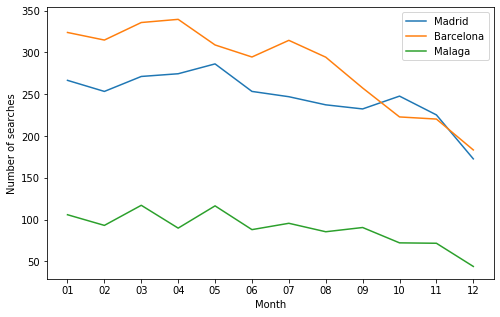

In [27]:
plt.figure(figsize=(8,5))
plt.plot(result_MAD['Month'], result_MAD['Searches'], label='Madrid')
plt.plot(result_BCN['Month'], result_BCN['Searches'], label='Barcelona')
plt.plot(result_MAL['Month'], result_MAL['Searches'], label='Malaga')
plt.xlabel('Month')
plt.ylabel('Number of searches')
plt.legend()